<div style="text-align: center; background-color: #bd4f0a; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  MÔ HÌNH HOÁ DỮ LIỆU
</div>

### Thông tin nhóm:

<center>

| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Nguyễn Đức Mạnh    | 20120019  |
| Nguyễn Văn Hiến    | 22120101  |
| Đặng Minh Hoàng       | 22120110  |
| Nguyễn Ngọc Hoàng     | 22120112  |
| Quách Tề Hoằng     | 22120114  |

</center>


### Giảng viên hướng dẫn: 
##### **Thầy Lê Nhựt Nam**
##### **Thầy Lê Ngọc Thành**
---

## Nội dung <a id="content"></a>
1. [Khai báo thư viện](#library)  
2. [Lấy dữ liệu](#collect)  
3. [Khám phá tương quan](#data-exploration)      
4. [Mối quan hệ giữa các biến](#relationship)  
5. [Lựa chọn đặc trưng](#select)<br>
    5.1 [Kiểm định thống kê](#statistics)<br>
    5.2 [Đánh giá mức độ quan trọng](#reflection)<br>
    5.3 [Kết luận](#conclusion) <br>
6. [Xây dựng mô hình](#build-model) <br>
    6.1 [Chuẩn hoá dữ liệu](#normalize) <br>
    6.2 [Thử nghiệm với các mô hình học máy](#experiment) <br>
    6.3 [So sánh độ đo của các mô hình](#compare)<br>
7. [Tham khảo](#references)


## 1. Khai báo thư viện <a id="library"></a>
###### [(Về trang đầu)](#content)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

import statsmodels.api as sm
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings("ignore")

## 2. Lấy dữ liệu <a id="collect"></a>
###### [(Về trang đầu)](#content)

In [2]:
df = pd.read_csv('./Data/DSPhongTro_DaXuLy.csv',sep='\t')
df.head()

,Địa chỉ,Diện tích,Số phòng ngủ,Số toilet,Nội thất,Mức giá,Ngày đăng tin
0,16,20.0,1.0,1.0,2,4.0,2024-10-22
1,16,60.0,2.0,2.0,0,10.0,2024-10-23
2,3,45.0,1.0,1.0,0,7.3,2024-10-23
3,2,30.0,1.0,1.0,2,4.1,2024-10-17
4,19,28.0,1.0,1.0,0,2.8,2024-10-23


## 3. Khám phá tương quan <a id="data-exploration"></a>
###### [(Về trang đầu)](#content)

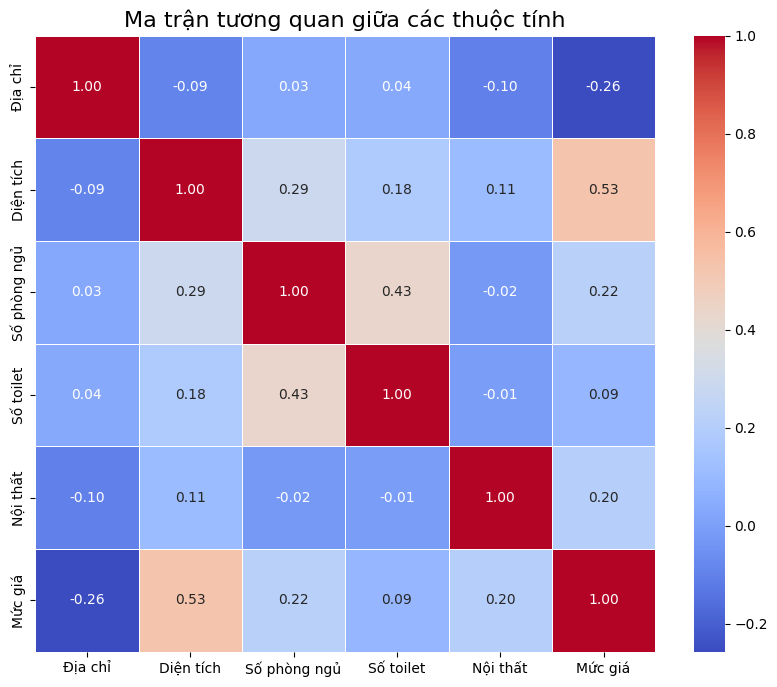

In [3]:
df_numeric = df.drop(columns='Ngày đăng tin')

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Ma trận tương quan giữa các thuộc tính", fontsize=16)

plt.show()

### Phân tích ma trận tương quan giữa các thuộc tính của nhà trọ

#### Các tương quan tích cực mạnh (>0.4)
1. Diện tích và Mức giá (0.53):
   - Mối quan hệ tương quan thuận khá mạnh
   - Diện tích càng lớn thì mức giá càng cao
   
2. Số phòng ngủ và Số toilet (0.43):
   - Tương quan thuận vừa phải
   - Phù hợp logic: nhà có nhiều phòng ngủ thường có nhiều toilet

#### Các tương quan yếu (0.2 - 0.4)
1. Diện tích và Số phòng ngủ (0.29):
   - Tương quan thuận yếu
   - Cho thấy không phải cứ diện tích lớn là có nhiều phòng ngủ

2. Số phòng ngủ và Mức giá (0.22):
   - Tương quan thuận yếu
   - Số phòng ngủ không phải là yếu tố quyết định chính đến giá

#### Các tương quan nghịch đáng chú ý
1. Địa chỉ và Mức giá (-0.26):
   - Tương quan nghịch yếu
   - Có thể hiểu là các khu vực xa trung tâm có giá thấp hơn

2. Địa chỉ và Diện tích (-0.09):
   - Tương quan nghịch rất yếu
   - Cho thấy diện tích không phụ thuộc nhiều vào vị trí

#### Điểm đáng chú ý
1. Nội thất có tương quan yếu với hầu hết các thuộc tính khác:
   - Với mức giá (0.20)
   - Với diện tích (0.11)
   - Với số phòng ngủ (-0.02)

2. Số toilet có tương quan yếu với mức giá (0.09):
   - Cho thấy số lượng toilet không ảnh hưởng nhiều đến giá

---

#### Kết luận
1. Yếu tố ảnh hưởng chính đến giá:
   - Diện tích là yếu tố quan trọng nhất
   - Vị trí (địa chỉ) có ảnh hưởng nghịch
   
2. Các yếu tố có ảnh hưởng vừa phải:
   - Số phòng ngủ
   - Nội thất

3. Gợi ý cho người thuê:
   - Cần cân nhắc tổng thể các yếu tố
   - Không nên chỉ tập trung vào một yếu tố đơn lẻ


## 4. Mối tương quan giữa các biến độc lập và biến phụ thuộc <a id="relationship"></a>
###### [(Về trang đầu)](#content)

In [4]:
def plot_relationship(data,independent_variable, dependent_variable):
    sns.scatterplot(x=independent_variable, y=dependent_variable, data=data)
    sns.regplot(x=independent_variable, y=dependent_variable, data=data,scatter=False,color='red')
    plt.show()

### Mối tương quan giữa Địa chỉ và Mức giá

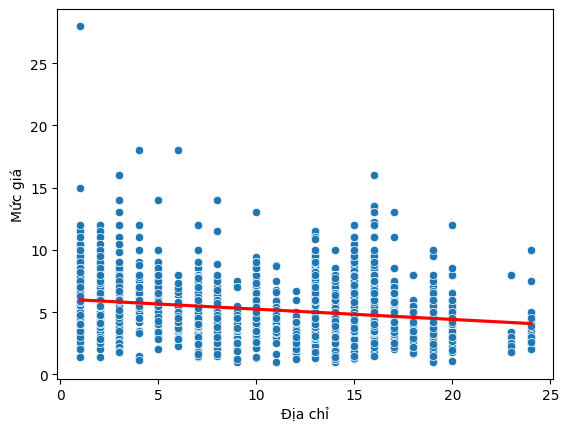

In [5]:
plot_relationship(df,'Địa chỉ','Mức giá')

#### Nhận xét:
- Ta nhận thấy có một mối tương quan âm giữa thuộc tính `Địa chỉ` và `Mức giá` nhưng khá yếu. Tuy vậy vẫn có một quan hệ là khi `Địa chỉ` càng tăng (các quận có giá trị được mã hóa càng về phía sau) thì `Mức giá` có xu hướng càng giảm.

### Mối tương quan giữa Diện tích và Mức giá

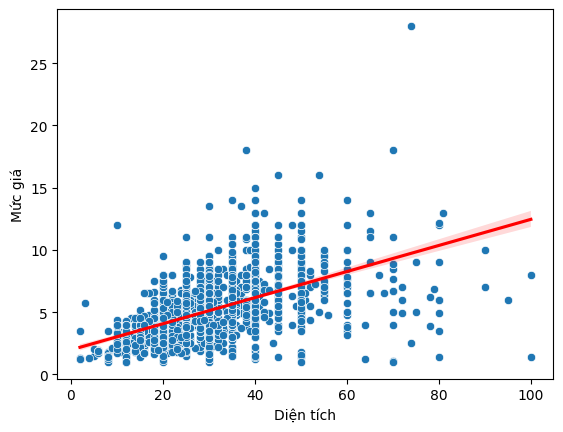

In [6]:
plot_relationship(df,'Diện tích','Mức giá')

#### Nhận xét:
- Ta nhận thấy có một mối tương quan dương rõ ràng giữa thuộc tính `Mức giá` và `Diện tích`. Khi `Diện tích` càng tăng thì `Mức giá` càng tăng.
- Vùng bóng mờ ở phía cuối đường hồi quy là khoảng tin cậy, càng về cuối đường tuyến tính ta thấy vùng bóng mờ càng rộng. Điều này thể hiện ở mức `Diện tích` lớn, không có mối quan hệ chắc chắn giữa `Diện tích` và `Mức giá`.

### Mối tương quan giữa Nội thất và Mức giá

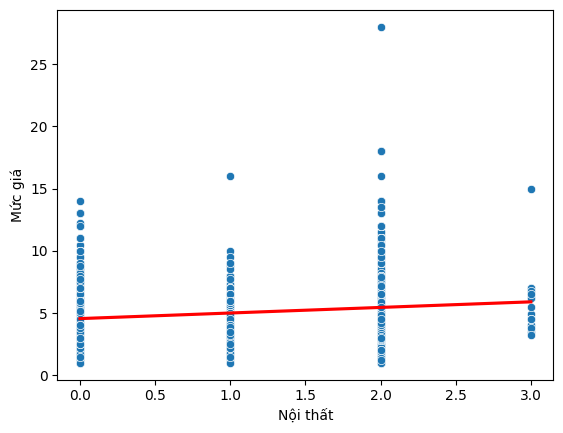

In [7]:
plot_relationship(df,'Nội thất','Mức giá')

#### Nhận xét:
- Ta nhận thấy có một mối tương quan dương giữa thuộc tính `Nội thất` và `Mức giá` nhưng nhìn chung là yếu. Tuy vậy, nó vẫn thể hiện chất lượng `Nội thất` càng tăng thì `Mức giá` cũng có xu hướng tăng nhẹ.

### Mối tương quan giữa Số phòng ngủ và Mức giá

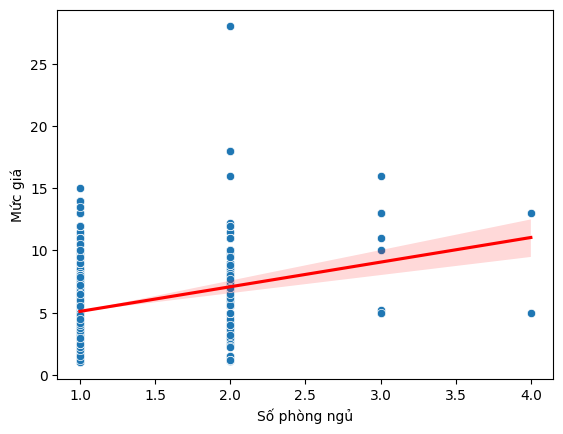

In [8]:
plot_relationship(df,'Số phòng ngủ','Mức giá')

#### Nhận xét:
- Ta nhận thấy có một mối tương quan dương giữa thuộc tính `Số phòng ngủ` và `Mức giá` nhưng nhìn chung là yếu. Tuy vậy vẫn có xu hướng tăng về `Mức giá` khi `Số phòng ngủ` tăng
- Vùng bóng mờ ở phía cuối đường hồi quy là khoảng tin cậy, càng về cuối đường tuyến tính ta thấy vùng bóng mờ càng rộng (và độ rộng khá lớn ở mức cuối). Điều này cho thấy khi `Số phòng ngủ` bắt đầu từ 2 trở đi, không có mối quan hệ chắc chắn giữa `Số phòng ngủ` và `Mức giá`, và sẽ ảnh hưởng không ít đến khả năng dự đoán của mô hình.

### Mối tương quan giữa Số toilet và Mức giá

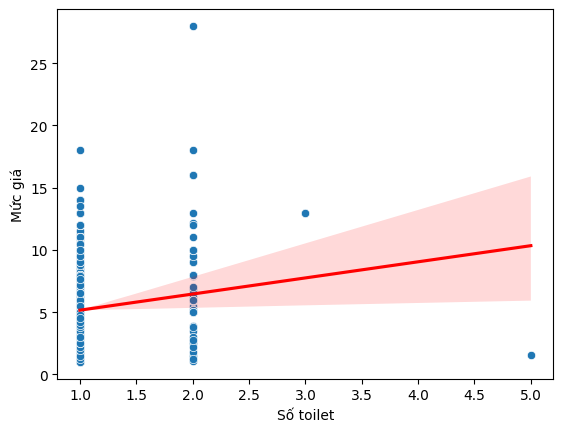

In [9]:
plot_relationship(df,'Số toilet','Mức giá')

#### Nhận xét:
- Ta nhận thấy có một mối tương quan dương giữa thuộc tính `Số toilet` và `Mức giá` nhưng nhìn chung là yếu. 
- Vùng bóng mờ ở phía cuối đường hồi quy là khoảng tin cậy, càng về cuối đường tuyến tính ta thấy vùng bóng mờ càng rộng (và độ rộng rất lớn ở mức cuối). Điều này thể hiện khi `Số toilet` bắt đầu từ 2 trở đi, mối quan hệ giữa `Số phòng ngủ` và `Mức giá` trở nên không rõ ràng.
- Điều này còn thể hiện:
    - Độ tin cậy của mô hình giảm đi khi số toilet lớn hơn.
    - Ở các giá trị lớn, mô hình ít có khả năng dự đoán chính xác do dữ liệu ít và phân tán hơn.

### Kết luận
- Nhìn chung, ta nhận thấy 2 thuộc tính `Số phòng ngủ` và `Số toilet` thể hiện mối quan hệ không rõ ràng với mức giá khi các giá trị này ở mức càng lớn. Vì dữ liệu chủ yếu chỉ tập trung nhiều ở mức giá trị thấp.

## 5. Lựa chọn đặc trưng <a id="select"></a>

### 5.1 Kiểm định thống kê  <a id="statistics"></a>
###### [(Về trang đầu)](#content)

#### 5.1.1 Lý thuyết

##### Coefficient (Hệ số hồi quy)
**Định nghĩa:**
 Hệ số hồi quy thể hiện mức độ và hướng tác động của từng biến độc lập (feature) đến biến phụ thuộc (target) trong mô hình hồi quy tuyến tính.

**Ý nghĩa:**

Dấu của hệ số:
 - Dương: Biến độc lập tăng thì biến phụ thuộc cũng tăng.
 - Âm: Biến độc lập tăng thì biến phụ thuộc giảm.
 
Độ lớn của hệ số: Hệ số càng lớn, tác động của biến đó đến giá trị dự đoán càng mạnh

---

##### P-value (giá trị P)
**Định nghĩa:**
 P-value là xác suất để quan sát được kết quả như dữ liệu hiện tại (hoặc cực đoan hơn) khi giả thuyết không đúng (H₀: Hệ số = 0).

**Ý nghĩa:**

P-value cho biết biến độc lập có ý nghĩa thống kê trong mô hình hay không.

Ngưỡng phổ biến là xét P-value < 0.05:

- Nếu P-value < 0.05: Biến độc lập có ý nghĩa thống kê (reject H₀).
- Nếu P-value ≥ 0.05: Biến độc lập không có ý nghĩa thống kê (fail to reject H₀).

#### 5.1.2 Đối với thuộc tính số

In [10]:
X = df.drop(columns={'Ngày đăng tin', 'Mức giá'}, axis=1)
y = df['Mức giá']

In [11]:
numerical_cols = ['Diện tích', 'Số phòng ngủ', 'Số toilet']
X_const = sm.add_constant(X[numerical_cols])
model = sm.OLS(y, X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mức giá   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     619.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:55:38   Log-Likelihood:                -8637.3
No. Observations:                4600   AIC:                         1.728e+04
Df Residuals:                    4596   BIC:                         1.731e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.8463      0.191      9.668      0.000       1.472       2.221
Diện tích        0.1014      0.003     39.379      0.000       0.096       0.106
Số phòng ngủ     0.7910      0.129      6.148      0.000       0.539       1.043
Số toilet       -0.5853      0.199     -2.942      0.003      -0.975      -0.195
==============================================================================
Omnibus:                     1020.127   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11836.401
Skew:                           0.722   Prob(JB):                         0.00
Kurtosis:                      10.725   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Nhận xét:

Dựa vào hệ số (`coef`) và giá trị p-value (`P>|t|`):
- **Hệ số intercept** (`const`):
    - Giá trị intercept là 1.8463, có nghĩa là khi tất cả các đặc trưng khác bằng 0, giá trị dự đoán cho Mức giá trung bình là 1.846 triệu.
- **Diện tích**:
    - `coef`: 0.1014 -> Mỗi mét vuông diện tích tăng thêm sẽ làm giá tăng trung bình 0.1014 triệu.
    - `P-value`: 0.000 -> **Rất có ý nghĩa thống kê** (Significant).
- **Số phòng ngủ**:
    - `coef`: 0.7910 -> Mỗi phòng ngủ tăng thêm sẽ làm giá tăng trung bình 0.791 triệu.
    - `P-value`: 0.000 -> **Rất có ý nghĩa thống kê** (Significant).
- **Số toilet**:
    - `coef`: -0.5853 -> Số toilet tăng thêm lại có xu hướng làm giảm giá trung bình 0.585 triệu.
    - `P-value`: 0.003 -> **Có ý nghĩa thống kê** (Significant).

#### 5.1.3 Đối với thuộc tính phân loại

In [12]:
# Lấy các nhóm khác nhau theo 'Địa chỉ'
groups = [y[X['Địa chỉ'] == addr] for addr in X['Địa chỉ'].unique()]

# Thực hiện kiểm định ANOVA
anova_test = f_oneway(*groups)

anova_test_nội_thất = f_oneway(
    y[X['Nội thất'] == 0],
    y[X['Nội thất'] == 1],
    y[X['Nội thất'] == 2],
    y[X['Nội thất'] == 3]
)

print("ANOVA p-value for 'Địa chỉ':", anova_test.pvalue)
print("ANOVA p-value for 'Nội thất':", anova_test_nội_thất.pvalue)

ANOVA p-value for 'Địa chỉ': 4.2599314277455197e-221
ANOVA p-value for 'Nội thất': 4.500616410307567e-78


##### Nhận xét
- Đối với `Địa chỉ`:
    - Đây là một giá trị p-value cực kỳ nhỏ, cho thấy `Địa chỉ` **có ý nghĩa thống kê** rất lớn trong việc phân biệt giá trị của `Mức giá`.
    - Điều này hợp lý vì giá thuê nhà thường có sự khác biệt rõ rệt giữa các quận/huyện.
- Đối với `Nội thất`:
    - P-value này cũng rất nhỏ, chứng minh rằng `Nội thất` **có ý nghĩa thống kê** đáng kể trong việc ảnh hưởng đến `Mức giá`.
    - Các cấp độ nội thất (Không có, Cơ bản, Đầy đủ, Cao cấp) phản ánh mức độ tiện nghi và ảnh hưởng đến giá trị cho thuê.

### 5.2 Đánh giá mức độ quan trọng của các thuộc tính với nhau  <a id="reflection"></a>
###### [(Về trang đầu)](#content)

#### Đánh giá mức độ quan trọng

In [13]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame({
    'Đặc trưng': X.columns,
    'Mức độ quan trọng': rf_model.feature_importances_
}).sort_values(by='Mức độ quan trọng', ascending=False)

feature_importances

,Đặc trưng,Mức độ quan trọng
1,Diện tích,0.542255
0,Địa chỉ,0.316772
4,Nội thất,0.073028
2,Số phòng ngủ,0.042857
3,Số toilet,0.025087


#### Trực quan hóa

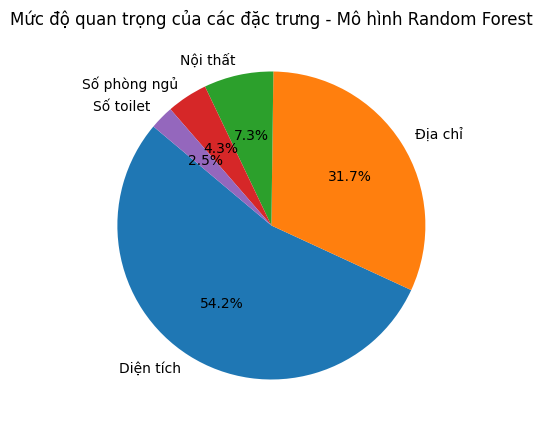

In [14]:
plt.figure(figsize=(5, 5))
plt.pie(feature_importances['Mức độ quan trọng'], labels=feature_importances['Đặc trưng'], autopct='%1.1f%%', startangle=140)
plt.title('Mức độ quan trọng của các đặc trưng - Mô hình Random Forest')
plt.show()

#### Nhận xét
Dựa trên mức độ quan trọng của các thuộc tính:
- `Diện tích`: Quan trọng nhất (54.19%).
- `Địa chỉ`: Xếp thứ hai (31.70%).
- `Nội thất`: Đóng góp nhỏ hơn (7.28%).
- `Số phòng ngủ` và `Số toilet` có mức độ ảnh hưởng thấp nhất (<5%).

### 5.3 Kết luận  <a id="conclusion"></a>
###### [(Về trang đầu)](#content)
Từ những nhận xét trên, nhóm sẽ quyết định chọn tất những đặc trưng như: Diện tích, Địa chỉ, Nội thất, Số phòng ngủ và Số toilet để dự đoán giá nhà và không bỏ thuộc tính nào.

## 6. Xây dựng mô hình  <a id="build-model"></a>
###### [(Về trang đầu)](#content)

### 6.1 Chuẩn hoá lại dữ liệu và các hàm liên quan  <a id="normalize"></a>
###### [(Về trang đầu)](#content)

Vì cột `Địa chỉ` là cột có kiểu dữ liệu phân loại và không có thứ tự, nên ta sẽ dùng kiểu mã hoá one-hot encoding để tránh gây thiên lệch khi xây dựng mô hình

#### Mã hoá lại dữ liệu

In [15]:
address_mapping = {}
with open("./Data/address.txt", "r", encoding="utf-8") as file:
    for line in file:
        district, code = line.strip().split(":")
        address_mapping[int(code)] = district

df['Địa chỉ'] = df['Địa chỉ'].map(address_mapping)

#### Chia tập dữ liệu train

In [16]:
# Đầu vào và đầu ra
X = df[['Địa chỉ','Diện tích', 'Số phòng ngủ', 'Số toilet', 'Nội thất']]
X_encoded = pd.get_dummies(X, columns=['Địa chỉ'])
y = df['Mức giá']

# Phân chia dữ liệu train, test, valid
X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42) 

#### Hàm tính độ đo

In [17]:
# Tính các chỉ số đánh giá
def evaluate(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Tạo DataFrame để lưu các chỉ số
    metrics_df = pd.DataFrame({
        "MSE": [mse],
        "R2": [r2],
    })
    
    return metrics_df

### 6.2 Thử nghiệm với các loại mô hình học máy khác nhau  <a id="experiment"></a>
###### [(Về trang đầu)](#content)

#### 6.2.1 Thử nghiệm với mô hình Linear Regression

##### Ý tưởng chính
Linear Regression là một thuật toán hồi quy bằng cách tìm ra đường thẳng (hay mặt phẳng) mà tổng khoảng cách từ các điểm trên dữ liệu đến đường thẳng (hay mặt phẳng) đó là ngắn nhất, thuật toán này thực hiện với ý tưởng sau:

- Chọn ra một đường thẳng ngẫu nhiên trên mặt phẳng, tính tổng khoảng cách từ các điểm dữ liệu đến đường thẳng đó. Nếu khoảng cách lớn, điều đó có nghĩa là đường thẳng chưa tối ưu, còn sai số còn cao.
- Dần dần xoay hoặc dịch chuyển đường thẳng này để giảm sai số. Cứ làm như vậy cho đến khi sai số đủ nhỏ.
- Tiếp tục điều chỉnh và cập nhật đường thẳng này lặp lại nhiều lần cho đến khi sai số không còn thay đổi nhiều nữa.

##### Áp dụng vào bộ dữ liệu

In [18]:
linear_regressor = LinearRegression()

# Huấn luyện
linear_regressor.fit(X_train_full, y_train_full)

# Dự đoán
y_linear_pred = linear_regressor.predict(X_test)

df_linear = evaluate(y_test, y_linear_pred)
print(df_linear)

        MSE        R2
0  1.745791  0.454826


#### 6.2.2 Thử nghiệm với mô hình Polynomial Regression

##### Ý tưởng chính
Polynomial Regression là một dạng mở rộng của Linear Regression. Thay vì tìm một đường thẳng tuyến tính để mô tả mối quan hệ giữa các biến, Polynomial Regression tìm một đường hoặc mặt phẳng bậc cao hơn, chẳng hạn như một đường cong bậc hai, bậc ba,... Điều này cho phép có thể giúp nắm bắt được các mối quan hệ phức tạp tốt hơn giữa các biến.
Thuật toán thực hiện ý tưởng tương tự như Linear Regression:
- Chọn ra một đường cong (mặt phẳng cong) ngẫu nhiên, tính tổng khoảng cách từ các điểm dữ liệu đến đường cong (mặt phẳng cong) đó. Nếu khoảng cách lớn, điều đó có nghĩa là sự lựa chọn chưa tối ưu, còn sai số còn cao.
- Dần dần xoay hoặc dịch chuyển đường cong (mặt phẳng cong) này để giảm sai số. Cứ làm như vậy cho đến khi sai số đủ nhỏ.
- Tiếp tục điều chỉnh và cập nhật đường cong (mặt phẳng cong) này lặp lại nhiều lần cho đến khi sai số không còn thay đổi nhiều nữa.

#### Thử nghiệm chọn bậc thích hợp với tập train-valid

In [19]:
# Khởi tạo giá trị tốt nhất
best_degree = None
best_score = float("inf")

# Duyệt qua các bậc (degree) khác nhau
for degree in [2, 3, 4]:  # Thử nghiệm với các bậc từ 2 đến 4
    poly = PolynomialFeatures(degree)
    model_poly = make_pipeline(poly, LinearRegression())
    
    # Huấn luyện mô hình trên tập train
    model_poly.fit(X_train, y_train)
    
    # Dự đoán trên tập validation
    y_val_pred = model_poly.predict(X_val)
    val_score = mean_squared_error(y_val, y_val_pred)
    print(f"Degree: {degree}, Validation MSE: {val_score}")
    
    # Lưu lại bậc tốt nhất
    if val_score < best_score:
        best_score = val_score
        best_degree = degree

print(f"Best degree: {best_degree}, Best Validation MSE: {best_score}")

Degree: 2, Validation MSE: 3.2605594942479663
Degree: 3, Validation MSE: 194229223407.86594
Degree: 4, Validation MSE: 5.503078306714832e+16
Best degree: 2, Best Validation MSE: 3.2605594942479663


##### Áp dụng vào bộ dữ liệu

In [20]:
poly_final = PolynomialFeatures(best_degree)
model_poly_final = make_pipeline(poly_final, LinearRegression())
model_poly_final.fit(X_train_full, y_train_full)

# Dự đoán trên tập test
y_poly_pred = model_poly_final.predict(X_test)

df_poly = evaluate(y_test, y_poly_pred)
print(df_poly)

        MSE        R2
0  1.690595  0.472063


#### 6.2.3 Thử nghiệm với mô hình Random Forest

##### Ý tưởng chính
Mô hình Random Forest là một phương pháp cải tiến của Decision Tree, Random Forest là sự kết hợp của nhiều cây quyết định khác nhau, chúng thực hiện với ý tưởng:

- Tạo ra một bộ dữ liệu mới từ bộ dữ liệu đầu vào bằng cách chọn ngẫu nhiên các hàng bất kì trong bộ dữ liệu và có cho phép sự trùng lắp giữa các lần lấy các mẫu
- Tạo cây quyết định dựa vào bộ dữ liệu mới này. Ở mỗi nút chia của cây, Random Forest không sử dụng tất cả các thuộc tính, mà chỉ sử dụng một tập hợp con nhỏ được chọn ngẫu nhiên. Điều này làm tăng tính đa dạng giữa các cây và giúp giảm hiện tượng overfitting.
- Lặp lại hai bước này cho tới khi rừng đạt được số lượng cây mong muốn.
- Muốn dự đoán một giá trị ta sẽ thực hiện duyệt qua tất cả các cây quyết định trong rừng và tính trung bình các giá trị này.

#### Thử nghiệm với tập valid để chọn siêu tham số tối ưu

In [21]:
best_n_estimators = None
best_max_depth = None
best_score = float("inf")

# Duyệt qua các tổ hợp của n_estimators và max_depth
for n_estimators in [50, 100, 150, 200]:
    for max_depth in [10, 20, 30, 40, 50]:
        # Tạo mô hình Random Forest với các tham số hiện tại
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)
        
        # Dự đoán trên tập validation
        y_val_pred = rf.predict(X_val)
        val_score = mean_squared_error(y_val, y_val_pred)
        print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, Validation MSE: {val_score}")
        
        # Lưu lại tham số tốt nhất
        if val_score < best_score:
            best_score = val_score
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print(f"Best n_estimators: {best_n_estimators}, Best max_depth: {best_max_depth}, Best Validation MSE: {best_score}")

n_estimators: 50, max_depth: 10, Validation MSE: 2.110996381580765
n_estimators: 50, max_depth: 20, Validation MSE: 2.1178122203482936
n_estimators: 50, max_depth: 30, Validation MSE: 2.1233721106067627
n_estimators: 50, max_depth: 40, Validation MSE: 2.120464296716085
n_estimators: 50, max_depth: 50, Validation MSE: 2.120464296716085
n_estimators: 100, max_depth: 10, Validation MSE: 2.0590275374837907
n_estimators: 100, max_depth: 20, Validation MSE: 2.054145663430611
n_estimators: 100, max_depth: 30, Validation MSE: 2.078549360230748
n_estimators: 100, max_depth: 40, Validation MSE: 2.076427684739593
n_estimators: 100, max_depth: 50, Validation MSE: 2.076427684739593
n_estimators: 150, max_depth: 10, Validation MSE: 2.0643753604416704
n_estimators: 150, max_depth: 20, Validation MSE: 2.0569640083996754
n_estimators: 150, max_depth: 30, Validation MSE: 2.0858218385872673
n_estimators: 150, max_depth: 40, Validation MSE: 2.0827292606085965
n_estimators: 150, max_depth: 50, Validation M

##### Áp dụng vào bộ dữ liệu

In [22]:
rf_final = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_final.fit(X_train_full, y_train_full)

# Đánh giá trên tập test
y_rf_pred = rf_final.predict(X_test)

df_rf = evaluate(y_test, y_rf_pred)
print(df_rf)

        MSE        R2
0  1.701181  0.468757


#### 6.2.4 Thử nghiệm với mô hình Gradient Boost

##### Ý tưởng chính
Gradient Boosting là một thuật toán tập trung vào việc sửa lỗi của mô hình hiện tại bằng cách thêm các mô hình mới, mỗi mô hình mới được xây dựng để giảm thiểu sai số còn lại từ mô hình trước đó với mục đích nhằm cải thiện dần dần hiệu suất của mô hình tổng thể qua từng bước nhỏ. Thuật toán được thực hiện với các ý tưởng chính sau:

- Trong bài toán hồi quy, thuật toán thường bắt đầu bằng cách tạo một nút lá là giá trị trung bình của lớp đích.
- Với mỗi mẫu, sai số còn lại được tính là sự chênh lệch giữa giá trị thực và giá trị dự đoán từ mô hình hiện tại.
- Một mô hình yếu, thường là một cây quyết định với độ sâu nhỏ, được xây dựng để dự đoán phần sai số còn lại từ bước trước nó.
- Kết hợp mô hình hiện tại và mô hình yếu bằng cách tính tổng dự đoán của mô hình hiện tại với tích kết quả của mô hình yếu và tỉ lệ học (learning rate), nhằm tránh tình trạng overfitting.
- Lặp lại việc xây mô hình yếu cho tới khi đạt giá trị mong muốn, mỗi lần xây mô hình yếu được xem như bước thêm một bước nhỏ về hướng đúng giúp mô hình cải thiện khả năng dự đoán.

#### Thử nghiệm để chọn siêu tham số thích hợp

In [23]:
best_learning_rate = None
best_n_estimators = None
best_max_depth = None
best_score = float("inf")

# 2. Duyệt qua các tổ hợp tham số
for learning_rate in [0.01, 0.05, 0.1, 0.2]:
    for n_estimators in [50, 100, 150]:
        for max_depth in [3, 5, 7]:
            # Khởi tạo mô hình với các tham số hiện tại
            gbr = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            gbr.fit(X_train, y_train)
            
            # Dự đoán trên tập validation
            y_val_pred = gbr.predict(X_val)
            val_score = mean_squared_error(y_val, y_val_pred)
            print(f"learning_rate: {learning_rate}, n_estimators: {n_estimators}, max_depth: {max_depth}, Validation MSE: {val_score}")
            
            # Lưu lại tổ hợp tham số tốt nhất
            if val_score < best_score:
                best_score = val_score
                best_learning_rate = learning_rate
                best_n_estimators = n_estimators
                best_max_depth = max_depth

print(f"Best learning_rate: {best_learning_rate}, Best n_estimators: {best_n_estimators}, Best max_depth: {best_max_depth}, Best Validation MSE: {best_score}")

learning_rate: 0.01, n_estimators: 50, max_depth: 3, Validation MSE: 2.711539770939274
learning_rate: 0.01, n_estimators: 50, max_depth: 5, Validation MSE: 2.61803561494747
learning_rate: 0.01, n_estimators: 50, max_depth: 7, Validation MSE: 2.5511776082196946
learning_rate: 0.01, n_estimators: 100, max_depth: 3, Validation MSE: 2.4075508044595955
learning_rate: 0.01, n_estimators: 100, max_depth: 5, Validation MSE: 2.297882488250362
learning_rate: 0.01, n_estimators: 100, max_depth: 7, Validation MSE: 2.2354205401297937
learning_rate: 0.01, n_estimators: 150, max_depth: 3, Validation MSE: 2.268206280283268
learning_rate: 0.01, n_estimators: 150, max_depth: 5, Validation MSE: 2.192089181270133
learning_rate: 0.01, n_estimators: 150, max_depth: 7, Validation MSE: 2.1540594236531123
learning_rate: 0.05, n_estimators: 50, max_depth: 3, Validation MSE: 2.134682381572504
learning_rate: 0.05, n_estimators: 50, max_depth: 5, Validation MSE: 2.0993668640712055
learning_rate: 0.05, n_estimators

##### Áp dụng vào bộ dữ liệu

In [24]:
gbr_final = GradientBoostingRegressor(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42
)

gbr_final.fit(X_train_full, y_train_full)
# 4. Đánh giá trên tập test
y_gbr_pred = gbr_final.predict(X_test)

df_gbr = evaluate(y_test, y_gbr_pred)
print(df_gbr)

        MSE        R2
0  1.704139  0.467833


#### 6.2.5 Thử nghiệm với mô hình XGBoost

##### Ý tưởng chính
XGBoost (eXtreme Gradient Boosting) là một mô hình học máy mạnh mẽ được ứng dụng rộng rãi, thuật toán sử dụng tập hợp các cây quyết định nhỏ để tạo thành một mô hình mạnh mẽ hơn. Mô hình XGBoost hoạt động dựa trên ý tưởng khá giống với Gradient Boost nhưng được cải tiến hơn nhằm tăng tốc độ xử lí và đưa ra quyết định trên tập dữ liệu lớn, gồm các ý chính:

- Xây dựng các cây quyết định liên tiếp (thay vì độc lập như trong Random Forest). Mỗi cây mới được thêm vào nhằm sửa lỗi còn lại của cây trước đó.
- Sử dụng Gradient Boosting: Dựa trên đạo hàm của hàm mất mát (gradient) để tối ưu hóa quá trình học của cây quyết định.
- Trọng số của các mẫu dữ liệu có sai số cao sẽ được ưu tiên trong quá trình học của cây tiếp theo.
- Dùng các phương pháp chính quy hoá (regularization) để phạt các cây có trọng số lớn nhằm giảm tình trạng overfitting, đồng thời cũng có cơ chế phạt việc tạo thêm nhánh không mang lại lợi ích lớn (gain thấp).

#### Thử nghiệm để chọn siêu tham số trên tập Train-Valid

In [25]:
for learning_rate in [0.01, 0.05, 0.1, 0.2]:
    for n_estimators in [50, 100, 150]:
        for max_depth in [3, 5, 7]:
            # Tạo mô hình XGBoost với các tham số hiện tại
            xgb = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42,
                objective="reg:squarederror"
            )
            xgb.fit(X_train, y_train)
            
            # Dự đoán trên tập validation
            y_val_pred = xgb.predict(X_val)
            val_score = mean_squared_error(y_val, y_val_pred)
            print(f"learning_rate: {learning_rate}, n_estimators: {n_estimators}, max_depth: {max_depth}, Validation MSE: {val_score}")
            
            # Lưu lại tham số tốt nhất
            if val_score < best_score:
                best_score = val_score
                best_learning_rate = learning_rate
                best_n_estimators = n_estimators
                best_max_depth = max_depth

print(f"Best learning_rate: {best_learning_rate}, Best n_estimators: {best_n_estimators}, Best max_depth: {best_max_depth}, Best Validation MSE: {best_score}")

learning_rate: 0.01, n_estimators: 50, max_depth: 3, Validation MSE: 2.706136264099904
learning_rate: 0.01, n_estimators: 50, max_depth: 5, Validation MSE: 2.6063377113965958
learning_rate: 0.01, n_estimators: 50, max_depth: 7, Validation MSE: 2.523872093526801
learning_rate: 0.01, n_estimators: 100, max_depth: 3, Validation MSE: 2.4051839567346445
learning_rate: 0.01, n_estimators: 100, max_depth: 5, Validation MSE: 2.2710241064046337
learning_rate: 0.01, n_estimators: 100, max_depth: 7, Validation MSE: 2.175976980758637
learning_rate: 0.01, n_estimators: 150, max_depth: 3, Validation MSE: 2.2670929947918825
learning_rate: 0.01, n_estimators: 150, max_depth: 5, Validation MSE: 2.1384939845819564
learning_rate: 0.01, n_estimators: 150, max_depth: 7, Validation MSE: 2.034405104482505
learning_rate: 0.05, n_estimators: 50, max_depth: 3, Validation MSE: 2.134037442587474
learning_rate: 0.05, n_estimators: 50, max_depth: 5, Validation MSE: 2.036251157023899
learning_rate: 0.05, n_estimator

##### Áp dụng vào bộ dữ liệu

In [26]:
xgb_final = XGBRegressor(
    n_estimators=best_n_estimators,
    learning_rate=best_learning_rate,
    max_depth=best_max_depth,
    random_state=42,
    objective="reg:squarederror"
)
xgb_final.fit(X_train_full, y_train_full)  # Huấn luyện trên tập train + validation

# Đánh giá trên tập test
y_xgb_pred = xgb_final.predict(X_test)

# Đánh giá mô hình
df_xgb = evaluate(y_test, y_xgb_pred)
print(df_xgb)

        MSE        R2
0  1.718826  0.463247


#### 6.2.6 Trực quan hoá các kết quả dự đoán của các mô hình

In [27]:
# Vẽ biểu đồ scatterplot
def plot_subplot(ax, y_test, y_pred, model_name):
    ax.scatter(y_test, y_pred, alpha=0.4, color='blue', edgecolors='gray')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

    ax.set_title(f'{model_name}')
    ax.set_xlabel('Real value')
    ax.set_ylabel('Predicted value')
    ax.legend()
    ax.grid(True)

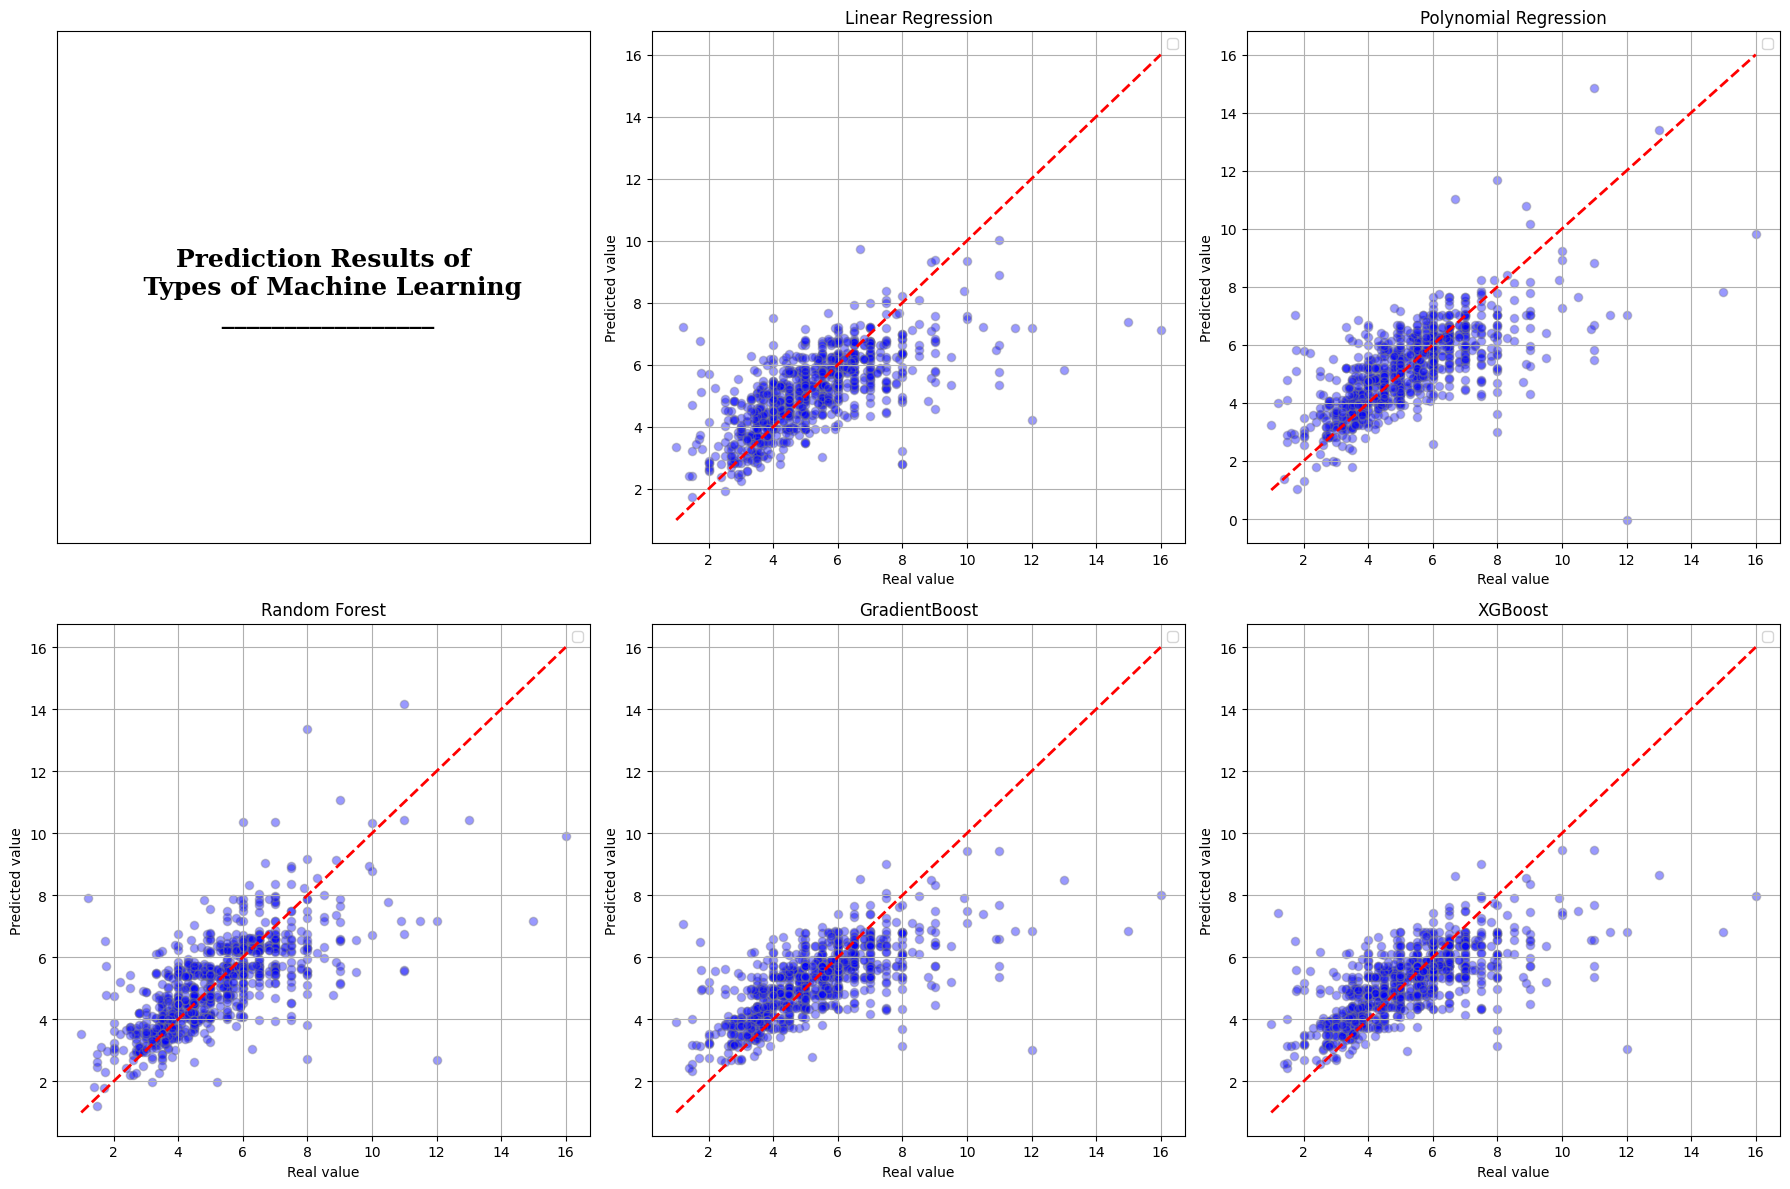

In [28]:
y_pred = [y_linear_pred, y_poly_pred, y_rf_pred, y_gbr_pred, y_xgb_pred]
model_names = ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'GradientBoost', 'XGBoost']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
            f'Prediction Results of\n  Types of Machine Learning\n _________________',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=18, fontweight='bold',
            fontfamily='serif',
            color="#000000")

for i in range(len(y_pred)):
    plot_subplot(axes[i + 1], y_test, y_pred[i], model_names[i])

plt.tight_layout()
plt.show()

#### Nhận xét
Nhìn chung khi trực quan bằng mắt, ta khó có thể đánh giá được độ tốt giữa 5 mô hình học máy này. Ta sẽ tiến hành trực quan hoá độ đo để có thể dễ dàng rút ra thông tin quan trọng hơn.

### 6.3 So sánh độ đo của các mô hình  <a id="compare"></a>
###### [(Về trang đầu)](#content)

#### 6.3.1 Lý thuyết
##### **Về MSE (Mean Square Error)**
<p><strong>Ý nghĩa:</strong> Đo lường độ chính xác của mô hình bằng cách tính bình phương sai lệch giữa giá trị thực tế và giá trị dự đoán.</p>

<p><strong>Công thức:</strong></p>
<p>MSE = (1 / n) * Σ (y<sub>i</sub> - ŷ<sub>i</sub>)<sup>2</sup></p>
<ul>
  <li>y<sub>i</sub>: Giá trị thực tế</li>
  <li>ŷ<sub>i</sub>: Giá trị dự đoán từ mô hình</li>
  <li>n: Số lượng quan sát</li>
</ul>

<p><strong>Đặc điểm:</strong></p>
<ul>
  <li>MSE càng nhỏ, mô hình càng tốt.</li>
  <li>Đơn vị của MSE là bình phương của đơn vị gốc (không cùng đơn vị với dữ liệu gốc).</li>
  <li>Nhạy cảm với các giá trị ngoại lai (outliers).</li>
</ul>  

---
##### **Về R<sup>2</sup>**
<p><strong>Ý nghĩa:</strong> Cho biết tỷ lệ phương sai của biến phụ thuộc <i>y</i> được giải thích bởi mô hình hồi quy.</p>

<p><strong>Công thức:</strong></p>
<p>R<sup>2</sup> = 1 - (SS<sub>res</sub> / SS<sub>tot</sub>)</p>
<ul>
  <li>SS<sub>res</sub> = Σ (y<sub>i</sub> - ŷ<sub>i</sub>)<sup>2</sup>: Tổng bình phương phần dư (Residual Sum of Squares).</li>
  <li>SS<sub>tot</sub> = Σ (y<sub>i</sub> - ȳ)<sup>2</sup>: Tổng bình phương tổng (Total Sum of Squares), với ȳ là giá trị trung bình của y.</li>
</ul>

<p><strong>Đặc điểm:</strong></p>
<ul>
  <li>R<sup>2</sup> nằm trong khoảng [0, 1].</li>
  <li>R<sup>2</sup> càng gần 1, mô hình giải thích phương sai của dữ liệu càng tốt.</li>
  <li>Nếu R<sup>2</sup> = 0, mô hình không giải thích được phương sai nào của dữ liệu.</li>
</ul>

---
#### **Nhận định chung**
<ul>
  <li><strong>MSE:</strong> Đánh giá sai số tuyệt đối của mô hình.</li>
  <li><strong>R<sup>2</sup>:</strong> Đánh giá mức độ phù hợp của mô hình với dữ liệu.</li>
</ul>

#### 6.3.2 Trực quan hoá độ đo

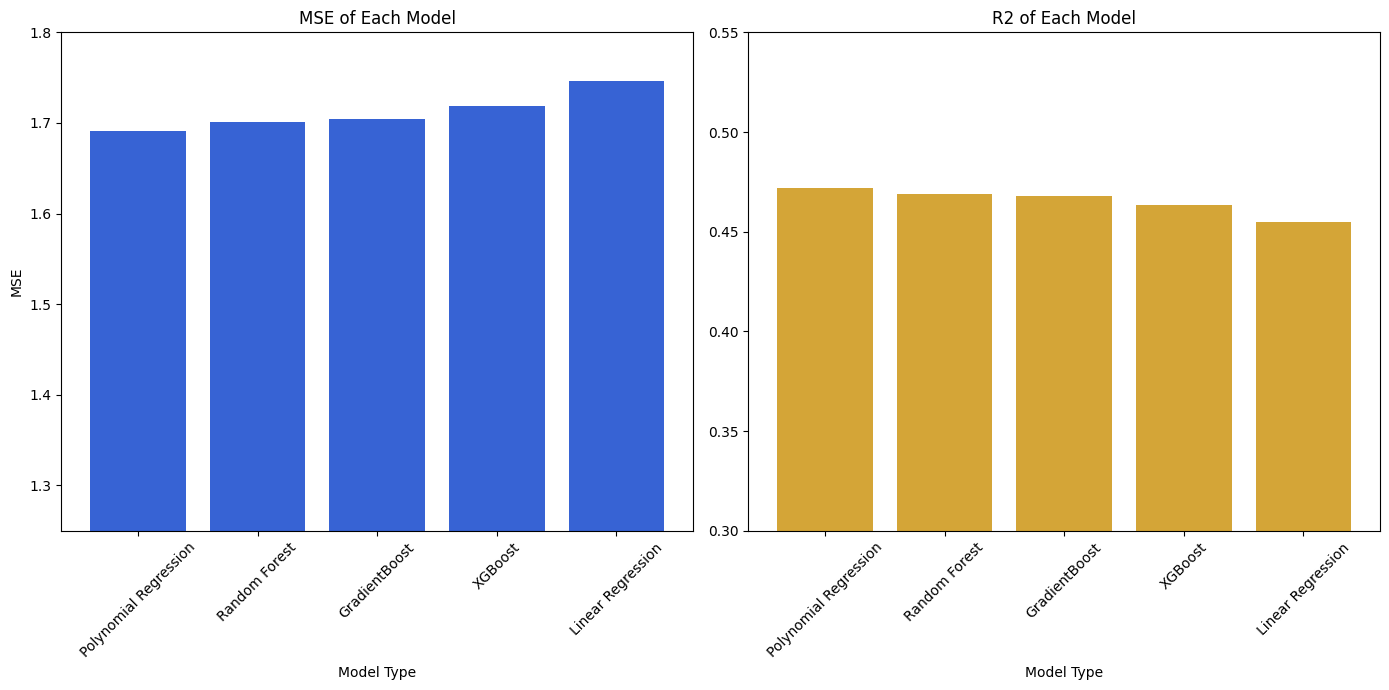

In [29]:
df_errors = pd.concat([df_linear, df_poly, df_rf, df_gbr, df_xgb], ignore_index=True)
df_errors['Type'] = model_names

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Biểu đồ đầu tiên (so sánh MSE)
df_sorted = df_errors.sort_values(by='MSE', ascending=True)
axes[0].bar(df_sorted['Type'], df_sorted['MSE'], color='#3763d4')
axes[0].set_title('MSE of Each Model')
axes[0].set_xlabel('Model Type')
axes[0].set_ylabel('MSE')
axes[0].set_ylim([1.25, 1.8])
axes[0].tick_params(axis='x', rotation=45)

# Biểu đồ thứ hai (so sánh R2)
df_sorted = df_errors.sort_values(by='R2', ascending=False)
axes[1].bar(df_sorted['Type'], df_sorted['R2'], color='#d4a537')
axes[1].set_title('R2 of Each Model')
axes[1].set_xlabel('Model Type')
axes[1].set_ylim([0.3, 0.55])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### **Nhận xét**
**MSE (Mean Squared Error):**

- Mô hình Polynomial Regression có lỗi dự đoán thấp nhất so với các mô hình khác, thể hiện hiệu quả tốt hơn trong việc tối ưu hóa dự đoán.

- Các mô hình khác như Random Forest, Gradient Boosting, và XGBoost có hiệu suất gần như tương đương nhau về lỗi MSE.

- Linear Regression có MSE cao nhất, cho thấy mô hình này không phù hợp với dữ liệu hoặc không đủ phức tạp để bắt được các mối quan hệ trong dữ liệu.

**R² (Hệ số xác định):**

- Polynomial Regression tiếp tục đạt hiệu quả tốt nhất, nhỉnh hơn cả các mô hình Random Forest, Gradient Boosting, và XGBoost.

- Linear Regression tiếp tục có hiệu suất thấp nhất, thể hiện khả năng giải thích hạn chế đối với dữ liệu.

---

#### **Tổng quan**
Việc dự đoán giá nhà có thể có mối quan hệ phi tuyến tính mạnh. Polynomial Regression có khả năng nắm bắt tốt các quan hệ phi tuyến tính này, giúp dự đoán sát hơn và giải thích phương sai tốt hơn. 

Linear Regression không phải là mô hình phù hợp trong trường hợp này do cả MSE cao và R² thấp.

## 7. Tham khảo <a id="references"></a>
###### [(về trang đầu)](#content)

[1] [Học về Linear Regression](https://www.youtube.com/watch?v=7ArmBVF2dCs)

[2] [Học về Polynomial Regression](https://www.youtube.com/watch?v=QptI-vDle8Y&t=135s)

[3] [Học về Random Forest](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&t=1s)

[4] [Học về Gradient Boost](https://www.youtube.com/watch?v=3CC4N4z3GJc)

[5] [Học về XGBoost](https://www.youtube.com/watch?v=OtD8wVaFm6E)

[6] [Học về độ đo](https://www.linkedin.com/pulse/understanding-evaluation-metrics-machine-learning-r-squared-pain/)

[7] [Các chỉ số thống kê](https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients)